In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# Read Train and Test dataset
data_train = pd.read_csv("data/KDDTrain+.txt")
data_test = pd.read_csv("data/KDDTest+.txt")

In [3]:
# Get columns name for data
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'outcome'
,'level'])

In [4]:
# Assign name for columns
data_train.columns = columns
data_test.columns  = columns

In [5]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [23]:
xtrain = data_train.drop('outcome', axis=1)
ytrain = data_train[['outcome']]
xtest = data_test.drop('outcome', axis=1)
ytest = data_test[['outcome']]

In [8]:
data_train.is_guest_login.value_counts()

0    124785
1      1187
Name: is_guest_login, dtype: int64

In [24]:
print("Train size",xtrain.shape)
print("Test size",xtest.shape)

Train size (125972, 42)
Test size (22543, 42)


In [15]:
# Get the distribution of the labels
labels = dict(data_train["outcome"].value_counts())
print(labels)

{'normal': 67342, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2}


In [14]:
# Get the distribution of the labels
test_labels = dict(data_test["outcome"].value_counts())
print(test_labels)

{'normal': 9711, 'neptune': 4656, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'nmap': 73, 'pod': 41, 'buffer_overflow': 20, 'multihop': 18, 'named': 17, 'ps': 15, 'sendmail': 14, 'rootkit': 13, 'xterm': 13, 'teardrop': 12, 'xlock': 9, 'land': 7, 'xsnoop': 4, 'ftp_write': 3, 'worm': 2, 'loadmodule': 2, 'perl': 2, 'sqlattack': 2, 'udpstorm': 2, 'phf': 2, 'imap': 1}


In [17]:
len(test_labels)

38

In [18]:
len(labels)

23

In [22]:
in_train_not_test=[]
for key in labels:
    if key not in test_labels:
        in_train_not_test.append(key)
print("Labels in train but not in test data: ",in_train_not_test)

in_test_not_train=[]
for key in test_labels:
    if key not in labels:
        in_test_not_train.append(key)
        
print("Labels in test but not in train data: ",in_test_not_train)

Labels in train but not in test data:  ['warezclient', 'spy']
Labels in test but not in train data:  ['mscan', 'apache2', 'processtable', 'snmpguess', 'saint', 'mailbomb', 'snmpgetattack', 'httptunnel', 'named', 'ps', 'sendmail', 'xterm', 'xlock', 'xsnoop', 'worm', 'sqlattack', 'udpstorm']


In [33]:
data_test[data_test['outcome'].isin(in_test_not_train)]['outcome'].value_counts()

mscan            996
apache2          737
processtable     685
snmpguess        331
saint            319
mailbomb         293
snmpgetattack    178
httptunnel       133
named             17
ps                15
sendmail          14
xterm             13
xlock              9
xsnoop             4
worm               2
sqlattack          2
udpstorm           2
Name: outcome, dtype: int64

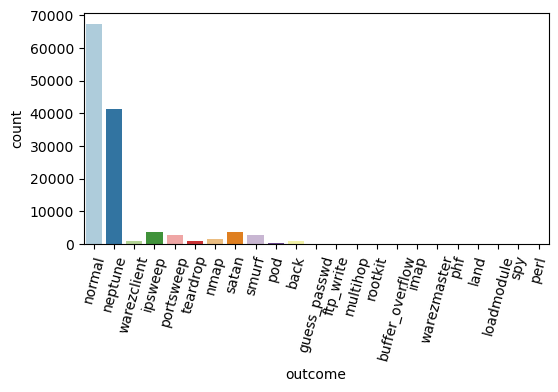

In [50]:
plt.figure(figsize=(6, 3))
sns.countplot(x='outcome',data=data_train,palette='Paired')
plt.xticks(rotation=75)
plt.show()

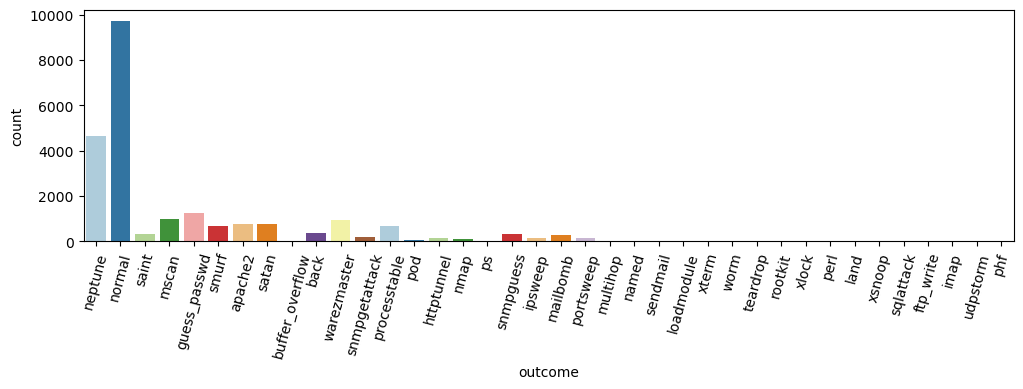

In [54]:
plt.figure(figsize=(12, 3))
sns.countplot(x='outcome',data=data_test,palette='Paired')
plt.xticks(rotation=75)
plt.show()

In [13]:
# Perform label encoding on categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for feature in categorical_features:
    X[feature] = encoder.fit_transform(X[feature])

y = encoder.fit_transform(y)

In [14]:
# Normalize the feature values
scaler = StandardScaler()

X_sc = scaler.fit_transform(X)

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
xtrain.shape

(100777, 42)

In [17]:
xtest.shape

(25195, 42)

In [18]:
ytrain.shape

(100777,)

In [19]:
ytest.shape

(25195,)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier()

In [23]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [24]:
y_pred = rfc.predict(xtest)

In [25]:
accuracy_score(y_pred,ytest)

0.9991268108751736